# Linear regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model as sk_lm
from sklearn import model_selection as sk_msel
from sklearn import metrics as sk_metrics
from sklearn import preprocessing as sk_pre
import statsmodels.api as sm

In [2]:
df_ad=pd.read_csv('data/Advertising.csv')

In [3]:
df_ad.drop(columns='Unnamed: 0', inplace=True)
df_ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 1. Fit linear regression model for TV Budget -> Sales

In [4]:
# Fit with statsmodels
lm1=sm.OLS.from_formula('Sales ~ TV', df_ad).fit()
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [5]:
# Fit with sklearn
tv=df_ad[['TV']]
sales=df_ad['Sales']
lm2=sk_lm.LinearRegression().fit(tv,sales)
(lm2.intercept_, lm2.coef_[0])

(7.032593549127693, 0.047536640433019764)

In [6]:
# Predicted Sales (statsmodels)
sales_pre1=lm1.predict(df_ad[['TV']])
sales_pre1[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [7]:
# Predicted Sales (sklearn)
sales_pre2=lm2.predict(df_ad[['TV']])
sales_pre2[:5]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814])

### 2. Confidence Intervals for estimated Parameters and Significance Test

In [8]:
# 95% Confidence Intervals with statsmodels
lm1.conf_int(0.05)

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [9]:
# t-statistics regression parameters
lm1.tvalues

Intercept    15.360275
TV           17.667626
dtype: float64

In [10]:
# p values
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

### 3. Bootstrap Distribution for Parameters

In [11]:
# Monto Carlo Simulation (Resampling)

# Number of Resamplings
k=10000;

# Array of estimated parameters
beta0=[]
beta1=[]

for _ in range(k):
    # Resampling
    df_ad_sample=df_ad.sample(n=len(df_ad.index), replace=True)
    
    # Fit parameters
    lm2=sk_lm.LinearRegression().fit(df_ad_sample[['TV']],df_ad_sample['Sales'])
    
    beta0.append(lm2.intercept_)
    beta1.append(lm2.coef_[0])
    


In [12]:
beta0=pd.Series(beta0)
beta1=pd.Series(beta1)

**Plot bootstrap distributions**

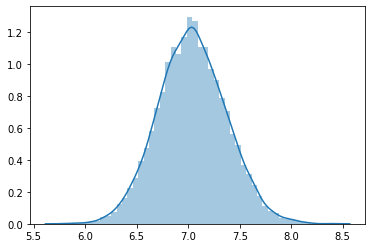

In [13]:
sns.distplot(beta0)

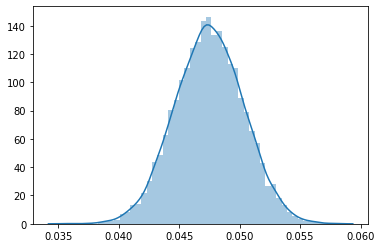

In [14]:
sns.distplot(beta1)

**95% Confidence Intervals by Bootstrapping**

In [15]:
beta0.quantile(0.025), beta0.quantile(0.975)

(6.403584357891406, 7.690389283602728)

In [16]:
beta1.quantile(0.025), beta1.quantile(0.975)

(0.04194163370433307, 0.05301351811129328)

### 4. Model Accuracy

**Residual Standard Error**

In [41]:
# Compute by hand
res = df_ad['Sales'] - sales_pre2
rss = res.T @ res
rse = np.sqrt(1/(res.size-2)*rss)
rse

3.2586563686504624

In [25]:
# Statsmodels
np.sqrt(lm1.mse_resid)

3.258656368650463

**$R^{2}$**

In [52]:
# Compute by hand

# Deviations from regression line
res = df_ad['Sales'] - sales_pre2
rss = res.T @ res

# Deviations from the mean
mean = df_ad['Sales'].mean()
res_mean = df_ad['Sales'] - mean
tss = res_mean.T @ res_mean

# R_squared
(tss - rss)/tss

0.6118750508500711

In [43]:
# Sklearn
sk_metrics.r2_score(df_ad['Sales'], sales_pre2)

0.611875050850071

In [44]:
# Statsmodels
lm1.rsquared

0.611875050850071

**Statsmodels Regression Summary**

In [28]:
lm1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.610    
Dependent Variable: Sales            AIC:                1042.0913
Date:               2020-02-09 19:12 BIC:                1048.6880
No. Observations:   200              Log-Likelihood:     -519.05  
Df Model:           1                F-statistic:        312.1    
Df Residuals:       198              Prob (F-statistic): 1.47e-42 
R-squared:          0.612            Scale:              10.619   
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     7.0326     0.4578   15.3603   0.0000   6.1297   7.9355
TV            0.0475     0.0027   17.6676   0.0000   0.0422   0.0528
------------------------------------------------------------------
Omnibus:              0.531         Durbin-Watson:           1.935
Prob(Omnibus):        0.767         Jarque-Bera (JB):        0.669
Skew:                 -0.089        Prob(JB):                0.716
Kurtosis:             2.779         Condition No.:           338  
==================================================================

"""

### 5. Multiple Linear Regression

In [53]:
# Fit with statsmodels
lm_mult=sm.OLS.from_formula('Sales ~ TV + Newspaper + Radio', df_ad).fit()
lm_mult.params

Intercept    2.938889
TV           0.045765
Newspaper   -0.001037
Radio        0.188530
dtype: float64

In [54]:
lm_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 10 Feb 2020   Prob (F-statistic):           1.58e-96
Time:                        11:04:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**F-statistics (570) and corresponding p-value show significance of regression in total. High p-value of newspaper shows that Newspaper factor probably not significant and may be removed from multiple regression.**

In [60]:
# Correlation Matrix
df_ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### 6. Model Evaluation with Train-Test-Split

**Evaluate including all 3 predictors**

In [105]:
X=df_ad[['TV', 'Radio', 'Newspaper']]
y=df_ad['Sales']

# Train-test split
X_train, X_test, y_train, y_test = sk_msel.train_test_split(X, y, test_size=0.33, random_state=0)

# Fitting
lm_trn=sk_lm.LinearRegression().fit(X_train,y_train)

# Predict
y_pre=lm_trn.predict(X_test)

# Mean standard Error of prediction
sk_metrics.mean_squared_error(y_test, y_pre, squared=False)

1.8542204770071635

**Evaluate without Newspaper**

In [106]:
X=df_ad[['TV', 'Radio']]
y=df_ad['Sales']

# Train-test split
X_train, X_test, y_train, y_test = sk_msel.train_test_split(X, y, test_size=0.33, random_state=0)

# Fitting
lm_trn=sk_lm.LinearRegression().fit(X_train,y_train)

# Predict
y_pre=lm_trn.predict(X_test)

# Mean standard Error of prediction
sk_metrics.mean_squared_error(y_test, y_pre, squared=False)

1.8463663957877516

In [109]:
# Relate standard error to estimated mean of Sales
y_pre.mean()

13.55527448527005

### 7. Limitation of Linear Model

In [66]:
# Predicted Sales
sales_pre = lm_mult.predict(df_ad[['TV', 'Newspaper', 'Radio']])
sales_pre[:5]

0    20.523974
1    12.337855
2    12.307671
3    17.597830
4    13.188672
dtype: float64

**Plot Residuals depending on TV and Radio inputs**

Text(0.5, 0, 'Sales Residuals')

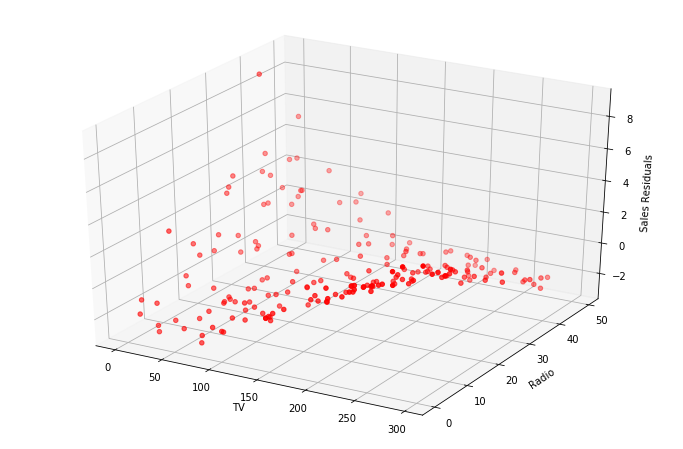

In [84]:
# Plot Residuals TV, Radio -> Sales
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ad['TV'], df_ad['Radio'], sales_pre - df_ad['Sales'], c='r', marker='o')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales Residuals')

**Plot shows non-linear relationship: the linear model overestimates Sales where budget is spent exclusively on TV or Radio and tends to underestimate Sales if budget is split evenly -> Synergy effect.**